# Web Scrapping using Python
## Comparing Product Prices. 
#### Here we have taken Casio MJ 12D Calculator

### Importing the required Libraries

In [1]:
import requests
from bs4 import BeautifulSoup #For web scraping

### Taking URL from Sites

In [2]:
amazon_url = "https://www.amazon.in/dp/B0752LL57V/"

In [3]:
flipkart_url = "https://www.flipkart.com/casio-mj-12d-bk-electronic-basic-calculator/p/itmeqq5f4guqfqkd"

In [4]:
moglix_url = "https://www.moglix.com/casio-mj-120gst-12-digits-gst-calculator/mp/msn4k6zyd668kq"

In [5]:
onshopdeals_url = "https://onshopdeals.com/casio-mj-12d-150-steps-check-and-correct-desktop-calculator/"

In [6]:
stamo_url = "https://www.statmo.in/product/casio-mj-120gst-calculator/"

To get  user-agent , google my user agent

In [7]:
headers = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36/8mqMlPuL-96'}

### Amazon

In [8]:
page = requests.get(url=amazon_url, headers=headers) 
soup = BeautifulSoup(page.content,"html.parser") 

Now go to the Amazon page, right-click on the product price, and inspect, and find the element with id/class. Replace the element name and id accordingly. (Example : price = soup.find('div', id = "ProductPrice")

In [9]:
price = soup.find('span', class_ = "a-offscreen")
amazon_price = int(float(((price.get_text()).strip()).replace("₹" , "")))
print(amazon_price)

418


#### Step by step to scrape out Price from tags

In [10]:
price.get_text() #.get_Text() - Will get text from html tags

'₹418.00'

In [11]:
(price.get_text()).strip() #.strip() - Removing special characters like \n (newline)

'₹418.00'

In [12]:
((price.get_text()).strip()).replace("₹" , "") #.replace() - Removes the ₹ symbol from the string

'418.00'

In [13]:
float(((price.get_text()).strip()).replace("₹" , "")) #int() / float() - Converts the string to respective datatype

418.0

#### Similarly , following the same steps , we will scrape out prices from rest of the websites.

### Flipkart

In [14]:
page = requests.get(url=flipkart_url, headers=headers) 
soup = BeautifulSoup(page.content,'html.parser') 

In [15]:
price = soup.find('div',class_ = "_30jeq3 _16Jk6d")
flipkart_price = int(((price.get_text()).strip()).replace("₹" , ""))
print(flipkart_price)

418


### Moglix

In [16]:
page = requests.get(url=moglix_url, headers=headers) 
soup = BeautifulSoup(page.content,'html.parser') 

In [17]:
price = soup.find('span',class_ = "f-left inline-block f-size-28 text-black pad-r-10 f-size-xs-22 text-500")
moglix_price = int(((price.get_text()).strip()).replace("₹" , ""))
print(moglix_price )

439


### On Shop Deals

In [18]:
page = requests.get(url=onshopdeals_url, headers=headers) 
soup = BeautifulSoup(page.content,'html.parser') 

In [19]:
price = soup.find('span',class_ = "price price--withTax price--main")
onshop_price = int(((price.get_text()).strip()).replace("₹" , ""))
print(onshop_price )

329


### Stamo

In [20]:
page = requests.get(url=stamo_url, headers=headers) 
soup = BeautifulSoup(page.content,'html.parser') 

In [21]:
price = soup.find('span',class_ = "woocommerce-Price-amount amount")
stamo_price = int(((price.get_text()).strip()).replace("₹" , ""))
print(stamo_price )

495


## Analysis of Results

Pandas is a python library used to analyze data. We will be using pandas to represent our findings in a formatted way and analyzing through it.

In [22]:
import pandas as pd

In [23]:
website_list = ['Amazon' , 'Flipkart' , 'Moglix' , 'On Shop Deals' , 'Stamo']
price_list = [amazon_price , flipkart_price , moglix_price , onshop_price , stamo_price]
url_list = [amazon_url,flipkart_url,moglix_url,onshopdeals_url,stamo_url]
#Creating lists for each of the details for further processing

Now we will create a DataFrame out of the data we have extracted

In [24]:
data = pd.DataFrame({"Website" :website_list , "Price" : price_list , "URL" : url_list})
data = data.set_index("Website")
data

,Price,URL
Website,,
Amazon,418,https://www.amazon.in/Casio-MJ-12D-Desktop-Cal...
Flipkart,418,https://www.flipkart.com/casio-mj-12d-bk-deskt...
Moglix,439,https://www.moglix.com/casio-mj-120gst-12-digi...
On Shop Deals,329,https://onshopdeals.com/casio-mj-12d-150-steps...
Stamo,495,https://www.statmo.in/product/casio-mj-120gst-...


To find the best price out of our findings , we will use the functions

In [25]:
data.Price.min() #will print the minimum value from the Price column from the dataframe

329

In [26]:
data.Price == data.Price.min() #will print True False accordingly if the minimum value matches the Price in the column.

Website
Amazon           False
Flipkart         False
Moglix           False
On Shop Deals     True
Stamo            False
Name: Price, dtype: bool

In [27]:
data[data.Price == data.Price.min()] #will print the row from the dataset wherever the value is true

,Price,URL
Website,,
On Shop Deals,329,https://onshopdeals.com/casio-mj-12d-150-steps...


Hence, the website with the minimum price is displayed.

## Visualising the Results

<AxesSubplot:xlabel='Website'>

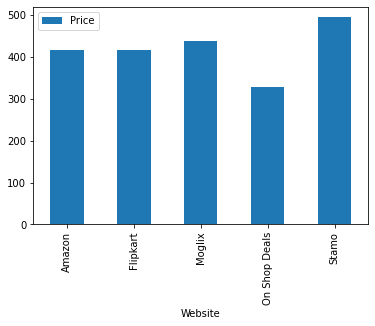

In [28]:
data.plot.bar()

From the above bar-chart , we may see that On Shop Deals is having the least price